In [24]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

## LIP const Frozen Wave definition

In [ ]:
L = 50e-3

def lip_const_func(z):
    return 1 if abs(z) < 0.1*L else 0
    
vfw = VectorialFrozenWave(centered=True)
vfw.vacuum_wavelength = 1064e-9
vfw.medium_refractive_index = 1.33
vfw.N = 25
vfw.L = L
vfw.Q = 0.9994*vfw.wavenumber
vfw.reference_function = lip_const_func

In [ ]:
z = np.linspace(-L/2, L/2, 251)

fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

plt.plot([z*1e3 for z in z], [vfw.intensity(0, 0, z) for z in z], label='Frozen-wave')
plt.plot([z*1e3 for z in z], [vfw.reference_function(z)**2 for z in z], label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e3, L/2*1e3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-perfil-2D.png')

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


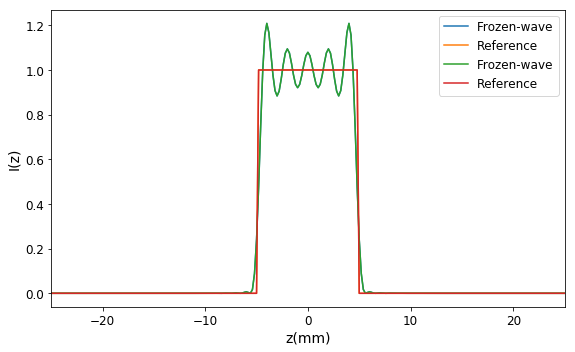

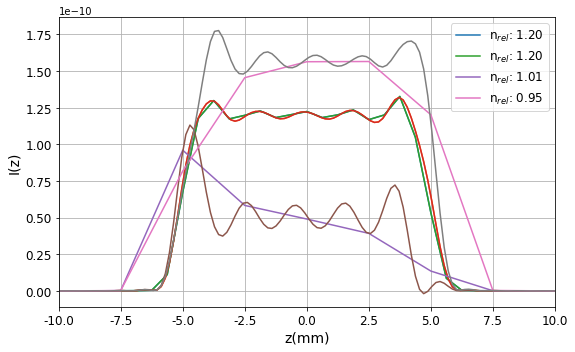

In [11]:
# LIP Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

emtdata = pd.read_csv('EMTheoryData.csv', index_col=0)
factor = 11.1

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -2*L/10,
          'stop': 2*L/10,
          'num': 7,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X1, [1*f for f in F1], label=label)
plt.plot(emtdata.index, [data*factor for data in emtdata['120']][::-1])

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X2, [100*f for f in F2], label=label)
plt.plot(emtdata.index, [data*factor*100 for data in emtdata['101']][::-1])

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X3, [10*f for f in F3], label=label)
plt.plot(emtdata.index, [data*factor*10 for data in emtdata['095']][::-1])

plt.xlim([-0.2*L, 0.2*L])

xlocs, xlabs = plt.xticks()
plt.xticks(xlocs, [xl*1e3 for xl in xlocs])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-longit-forces.png')

plt.show()

## LIP sin plus const Frozen Wave definition #

In [25]:
L = 500e-6

def lip_sin_const_func(z):
    if 0.1*L <= z and z <= 0.3*L:
        return 1
    elif -0.3*L <= z and z <= -0.1*L:
        return math.sin(math.pi*(z/(0.2*L) + 3/2))
    else: 
        return 0
    
vfw2 = VectorialFrozenWave(centered=True)
vfw2.vacuum_wavelength = 1064e-9
vfw2.medium_refractive_index = 1.33
vfw2.N = 15
vfw2.L = L
vfw2.Q = 0.975*vfw2.wavenumber
vfw2.reference_function = lip_sin_const_func

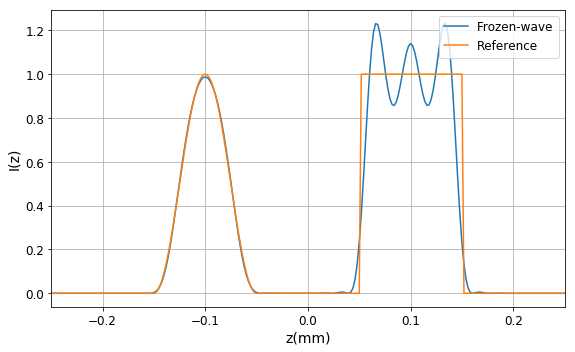

In [28]:
# LIPSIN Frozen Wave perfil plot
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

z = np.linspace(-L/2, L/2, 251)

plt.plot([z*1e3 for z in z], [vfw2.intensity(0, 0, z) for z in z], label='Frozen-wave')
plt.plot([z*1e3 for z in z], [vfw2.reference_function(z)**2 for z in z], label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e3, L/2*1e3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-perfil-2D.png')
plt.show()

In [ ]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

rho = np.linspace(-10e-6, 10e-6, 151)
z = np.linspace(-L/2, L/2, 151)
RHO, Z = np.meshgrid(rho, z)

def inty(rho, z):
    return vfw2.intensity(rho, 0, z, 'cylindrical')

vinty = np.vectorize(inty)

INTY = vinty(RHO, Z)

RHO = [rho/10**-6 for rho in RHO]
Z = [z/10**-3 for z in Z]
#INTY = [value/10**INTY_order for value in INTY]
# https://matplotlib.org/examples/color/colormaps_reference.html
ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.copper)
#cset = ax.contourf(RHO, Z, INTY, zdir='z', offset=0, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='x', offset=-Rmax, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='y', offset=Zmax, cmap=cmplt.coolwarm)

ax.set_xlabel(r'$\rho$ ($\mu$m)', fontsize=14)
#ax.set_xlim(-250, 250)
ax.set_ylabel(r'z (mm)', fontsize=14)
#ax.set_ylim(-25, 25)
zlabel = 'I(z)'
ax.set_zlabel(zlabel, fontsize=14)
#ax.set_zlim(0, inty_max)

ax.view_init(elev=35, azim=-35)

plt.savefig('LIP-sin-const-perfil-3D.png')
plt.show()

1/64
start: 15 Jul 2017 02:02:25
time: 23.790329933166504

2/64
start: 15 Jul 2017 02:02:49
time: 16.946973085403442

3/64
start: 15 Jul 2017 02:03:06
time: 19.14975070953369

4/64
start: 15 Jul 2017 02:03:25
time: 15.252925634384155

5/64
start: 15 Jul 2017 02:03:40
time: 13.978912830352783

6/64
start: 15 Jul 2017 02:03:54
time: 17.088682651519775

7/64
start: 15 Jul 2017 02:04:11
time: 12.116783857345581

8/64
start: 15 Jul 2017 02:04:24
time: 18.31404709815979

9/64
start: 15 Jul 2017 02:04:42
time: 20.581238746643066

10/64
start: 15 Jul 2017 02:05:02
time: 18.930449724197388

11/64
start: 15 Jul 2017 02:05:21
time: 14.822829484939575

12/64
start: 15 Jul 2017 02:05:36
time: 17.684844732284546

13/64
start: 15 Jul 2017 02:05:54
time: 24.64919924736023

14/64
start: 15 Jul 2017 02:06:19
time: 32.439675092697144

15/64
start: 15 Jul 2017 02:06:51
time: 38.83106589317322

16/64
start: 15 Jul 2017 02:07:30
time: 74.65127658843994

17/64
start: 15 Jul 2017 02:08:44
time: 72.77302527427

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


time: 173.4681191444397

48/64
start: 15 Jul 2017 02:55:13
time: 53.464343309402466

49/64
start: 15 Jul 2017 02:56:07
time: 29.35251784324646

50/64
start: 15 Jul 2017 02:56:36
time: 26.290149450302124

51/64
start: 15 Jul 2017 02:57:03
time: 44.118372440338135

52/64
start: 15 Jul 2017 02:57:47
time: 17.69868040084839

53/64
start: 15 Jul 2017 02:58:04
time: 48.39839506149292

54/64
start: 15 Jul 2017 02:58:53
time: 16.8763165473938

55/64
start: 15 Jul 2017 02:59:10
time: 14.25496244430542

56/64
start: 15 Jul 2017 02:59:24
time: 23.63533091545105

57/64
start: 15 Jul 2017 02:59:48
time: 51.046756982803345

58/64
start: 15 Jul 2017 03:00:39
time: 68.12614154815674

59/64
start: 15 Jul 2017 03:01:47
time: 23.223346710205078

60/64
start: 15 Jul 2017 03:02:10
time: 30.10977029800415

61/64
start: 15 Jul 2017 03:02:40
time: 29.183168172836304

62/64
start: 15 Jul 2017 03:03:09
time: 29.23123002052307

63/64
start: 15 Jul 2017 03:03:39
time: 59.51653981208801

64/64
start: 15 Jul 2017 0

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


time: 358.1963677406311

3/64
start: 15 Jul 2017 03:14:19
time: 30.52527165412903

4/64
start: 15 Jul 2017 03:14:49
time: 33.70228672027588

5/64
start: 15 Jul 2017 03:15:23
time: 17.619511127471924

6/64
start: 15 Jul 2017 03:15:41
time: 26.205246925354004

7/64
start: 15 Jul 2017 03:16:07
time: 71.04569435119629

8/64
start: 15 Jul 2017 03:17:18
time: 26.57295298576355

9/64
start: 15 Jul 2017 03:17:45
time: 25.858795881271362

10/64
start: 15 Jul 2017 03:18:10
time: 100.5251476764679

11/64
start: 15 Jul 2017 03:19:51
time: 363.6671223640442

12/64
start: 15 Jul 2017 03:25:55
time: 402.8502390384674

13/64
start: 15 Jul 2017 03:32:37
time: 46.98295783996582

14/64
start: 15 Jul 2017 03:33:24
time: 619.4552009105682

15/64
start: 15 Jul 2017 03:43:44
time: 739.835622549057

16/64
start: 15 Jul 2017 03:56:04
time: 14498.469502210617

17/64
start: 15 Jul 2017 07:57:42
time: 401.53480648994446

18/64
start: 15 Jul 2017 08:04:24
time: 283.60134053230286

19/64
start: 15 Jul 2017 08:09:07

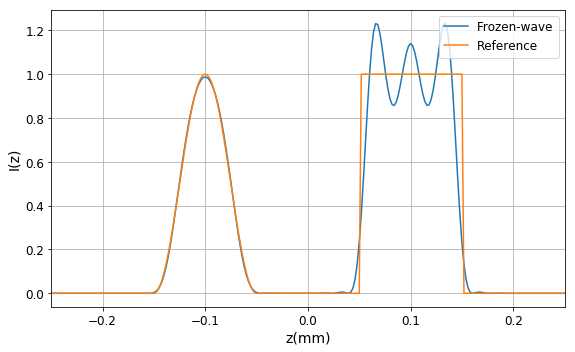

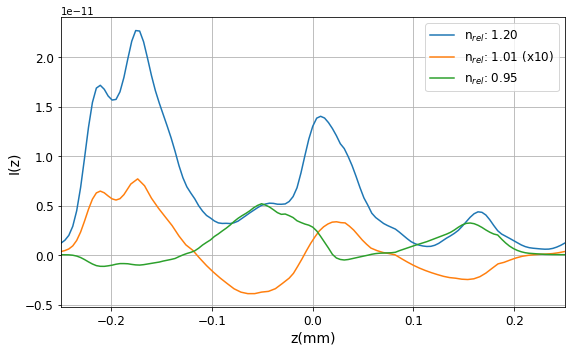

In [23]:
# LIPSIN Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -5*L/10,
          'stop': 5*L/10,
          'num': 70,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e3 for x in X1], [1*f for f in F1], label=label)

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot([x*1e3 for x in X2], [10*f for f in F2], label=label)

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e3 for x in X3], [1*f for f in F3], label=label)

plt.xlim([-L*1e3/2, L*1e3/2])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-forces.png')

plt.show()